In [1]:
!pip install keybert

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import json
import keybert

In [8]:
import glob

json_files = glob.glob("/content/drive/MyDrive/data/*.json")

dataframes = []

for file in json_files:
    with open(file, 'r') as f:
        json_data = json.load(f)
        df = pd.DataFrame(json_data)
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck
0,186276362,"{'steamid': '76561198241574674', 'num_games_ow...",english,Holy smokes.... Maxwell? My son. My boy. I've ...,1737702719,1737702719,True,0,0,0,0,True,False,True,False
1,186275425,"{'steamid': '76561198190453458', 'num_games_ow...",english,We love the company,1737701112,1737701112,True,0,0,0,0,True,False,True,False
2,186274181,"{'steamid': '76561198884604863', 'num_games_ow...",english,I love this game very very much. Me and my fam...,1737699170,1737699223,True,0,0,0,0,True,False,True,False
3,186273571,"{'steamid': '76561199753026070', 'num_games_ow...",english,you never know how your going to meat,1737698179,1737698179,True,0,0,0,0,True,False,True,False
4,186273408,"{'steamid': '76561199147732999', 'num_games_ow...",english,Fell down a hill into some water and died\n\n1...,1737697902,1737697902,True,0,0,0,0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254995,149564511,"{'steamid': '76561198132718298', 'num_games_ow...",english,Best 10 bucks ive ever spent,1699160433,1699160433,True,0,0,0,0,True,False,True,False
254996,149564350,"{'steamid': '76561198296451551', 'num_games_ow...",english,I am so in love with this game. VERY fun with ...,1699160151,1699160151,True,0,0,0,0,True,False,True,False
254997,149564278,"{'steamid': '76561198426227902', 'num_games_ow...",english,"""Is it still chasing m-AH-"" *horrific bone cru...",1699160052,1701330325,True,1,0,0.5,0,True,False,True,False
254998,149564259,"{'steamid': '76561198129365338', 'num_games_ow...",english,I have to say this has been one of the most am...,1699160018,1699160018,True,1,0,0.523809552192687988,0,True,False,True,False


In [5]:
from keybert import KeyBERT
model = KeyBERT('all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
df['text'] = df['review'].str.lower()
df['text'] = df['text'].str.replace(r'[\s\t\n]+', ' ', regex=True)
df['text'] = df['text'].str.replace(r'[^a-zA-Z]+', '', regex=True)

In [11]:
df['text']

,text
0,holy smokes maxwell my son my boy ive never ev...
1,we love the company
2,i love this game very very much me and my fami...
3,you never know how your going to meat
4,fell down a hill into some water and died\n\n
...,...
254995,best bucks ive ever spent
254996,i am so in love with this game very fun with f...
254997,is it still chasing mah horrific bone crunchin...
254998,i have to say this has been one of the most am...


In [15]:
df['word'] = df['review'].str.split()
word_df = df.explode('word', ignore_index=True)
word_df['word'] = word_df['word'].str.lower()
word_df['word'] = word_df['word'].str.replace(r'[^a-zA-Z]+', '', regex=True)
word_df = word_df[word_df['word'] != '']
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]
word_df = word_df[~word_df['word'].isin(stop_words)]
grouped_df = word_df.groupby('word')['word'].count()
freq_df =grouped_df.sort_values(ascending=False)
freq_df = freq_df[freq_df > 10]


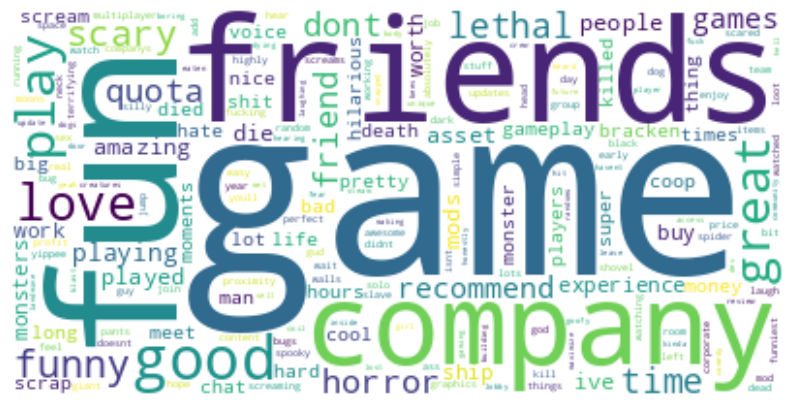

In [16]:
wordcloud_positive = WordCloud(background_color='white', max_words=500).generate_from_frequencies(freq_df)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc = "One of the BEST multiplayer horror games I've ever played. I haven't had a game genuinely terrify me while making me cry from laughter."
model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)


[('multiplayer', 0.4079),
 ('horror', 0.3705),
 ('terrify', 0.3271),
 ('game', 0.3198),
 ('games', 0.3015)]

In [ ]:
df

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,primarily_steam_deck,result
2276,185143253,"{'steamid': '76561198418926714', 'num_games_ow...",english,super scary alone a bit les scarier with bros\...,1736376899,1736376899,True,0,0,0,0,True,False,True,False,"[scary, scarier, goofy]"
2483,184988603,"{'steamid': '76561198886886046', 'num_games_ow...",english,Big black man likes grab you from behind and I...,1736221996,1736221996,True,0,0,0.476190477609634399,0,True,False,True,False,"[black, grab, likes]"
993,185840705,"{'steamid': '76561198095318492', 'num_games_ow...",english,Fun goofy game for everyone :),1737187538,1737187538,True,0,0,0,0,True,False,True,False,"[goofy, fun, game]"
3903,184211679,"{'steamid': '76561199450663502', 'num_games_ow...",english,A very fun game with friends and i love the co...,1735559363,1735559363,True,0,0,0,0,True,False,True,False,"[fun, 10, game]"
4006,184174125,"{'steamid': '76561199069671798', 'num_games_ow...",english,fun as hell,1735522187,1735522187,True,0,0,0,0,True,False,True,False,"[fun, hell]"
2521,184976827,"{'steamid': '76561199386733414', 'num_games_ow...",english,Be me\r\n> I hit one of my friends as a joke\r...,1736208836,1736208836,True,0,0,0,0,True,False,True,False,"[kill, shot, hit]"
3955,184186714,"{'steamid': '76561198367405834', 'num_games_ow...",english,Just do it.,1735533202,1735533202,True,0,0,0,0,True,False,True,False,[just]
4646,183831661,"{'steamid': '76561199064150495', 'num_games_ow...",english,good well drrunk swfgra,1735264972,1735264972,True,0,0,0,0,True,False,True,False,"[drrunk, swfgra, good]"
1367,185666638,"{'steamid': '76561199151035532', 'num_games_ow...",english,This company.... *takes long drag off of cigar...,1736970920,1736970920,True,0,0,0,0,True,False,True,False,"[cigarette, quota, titan]"
608,185993936,"{'steamid': '76561198041595853', 'num_games_ow...",english,"My experience is playing with random players, ...",1737347584,1737347584,False,1,0,0,0,True,False,True,False,"[players, games, community]"


In [24]:
def extract_keywords(text, model, ngram_range=(1, 1), top_n=3):
    if not isinstance(text, str) or len(text.strip()) == 0:  # 빈 텍스트 처리
        return []
    keywords = model.extract_keywords(
        text,
        keyphrase_ngram_range=ngram_range,
        stop_words='english',
        top_n=top_n
    )
    return [kw[0] for kw in keywords]  # 키워드 텍스트만 추출

# 4. "review" 열에서 키워드 추출 후 "result" 열에 추가
sdf = df.sample(20000)
sdf['result'] = sdf['review'].apply(lambda x: extract_keywords(x, model))

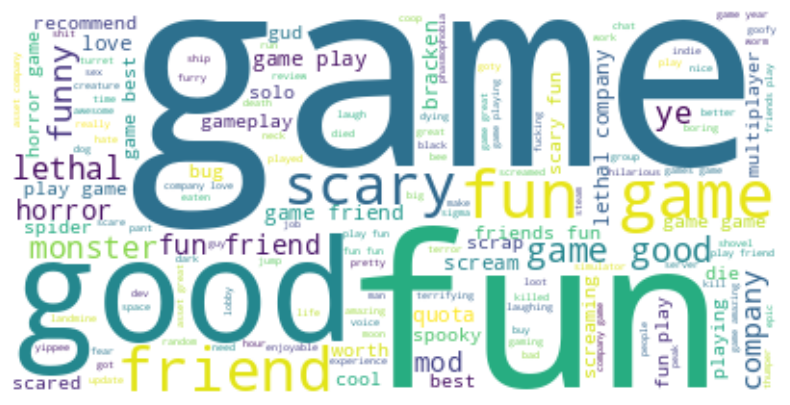

In [27]:
all_keywords = [keyword for keywords in sdf['result'] for keyword in keywords]
keyword_string = " ".join(all_keywords)
wordcloud = WordCloud(background_color='white', max_words=500).generate(keyword_string)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
keyword_string

'lethal multiplayer game scream game distance weekly event mods zazzed tzp maneater creature game accident workplace friends veri gut recommend gay dark exit building yippee trust play friends spooky gang fear game idiot best shadow screamed friend fun game history hired company shouldn fun game great murder mostners funny autistic playing pants multiplayer gaming recommend dying laughed haven good yes screamed neighbours complained horn noise favorite ahhhhhhh ahhhhhh ahhhhh horror immersive indie spiders hate horror game op beans veeerrryy goooood creative fun game lethal solo game fun scared game love game funny fun sooo terrifying games enjoying proximity chat incredible fun funny super play incredible absolutely rob black big day bvfcv yuhn boring pretty diddy game baby good scrap quota game cody game playing hours fun school company love fun fun game playing friends cash trash selling voice indian good gay game pants times shit yelling 10 cops yes game 10 funny game spectacular p

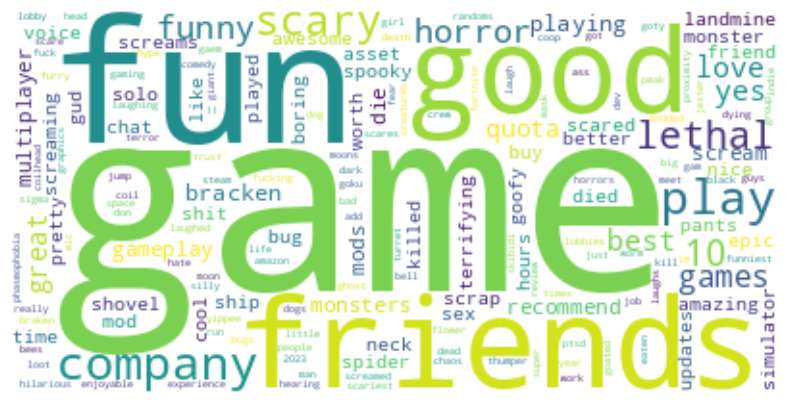

In [28]:
from collections import Counter
all_keywords = [keyword for keywords in sdf['result'] for keyword in keywords]
keyword_counts = Counter(all_keywords)
wordcloud = WordCloud(background_color='white').generate_from_frequencies(keyword_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
df['date'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['year_month'] = df['date'].dt.to_period('M')  # 연도-월 포맷 (YYYY-MM)
monthly_review_counts = df.groupby('year_month').size()
monthly_review_counts = monthly_review_counts.reset_index(name='review_count')
monthly_review_counts

,year_month,review_count
0,2023-11,69616
1,2023-12,69258
2,2024-01,43967
3,2024-02,15336
4,2024-03,8149
5,2024-04,9750
6,2024-05,3832
7,2024-06,4991
8,2024-07,5205
9,2024-08,5046


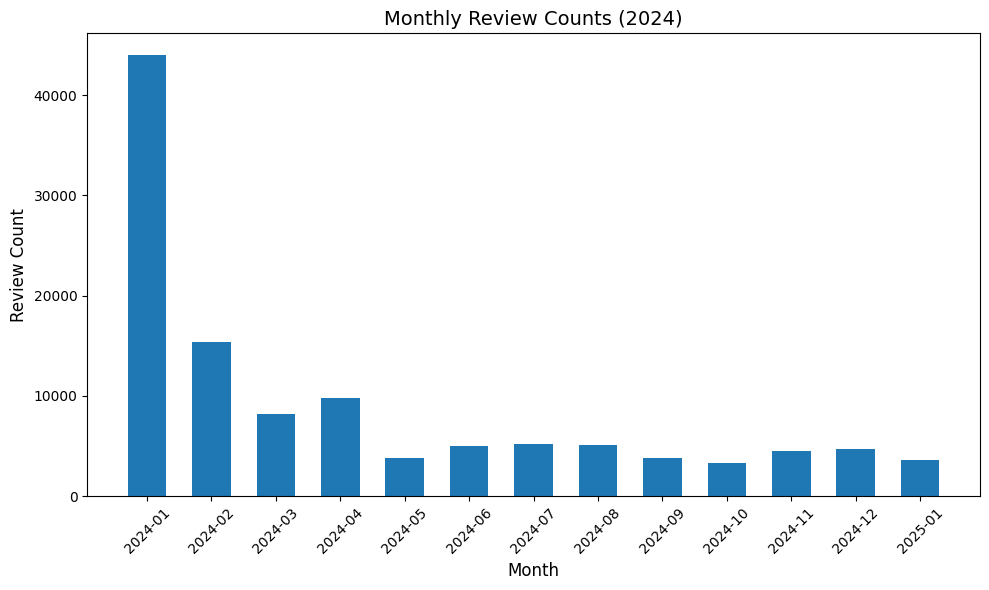

In [33]:
monthly_review_counts = monthly_review_counts.iloc[2:].reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(monthly_review_counts['year_month'].astype(str), monthly_review_counts['review_count'], width=0.6)
plt.title('Monthly Review Counts (2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()